#Machine Failure Classification

Source link for Dataset used in the project.

Dataset: - https://www.kaggle.com/competitions/playground-series-s3e17/data

Referred resource: -

https://www.geeksforgeeks.org/

https://scikit-learn.org/stable/

https://seaborn.pydata.org/tutorial/introduction



# Data Exploration

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loaded the dataset using Pandas library into the dataframe.

In [ ]:
df = pd.read_csv('./train.csv')

In [ ]:
df.shape

(136429, 14)

In [ ]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Exploring the dataset by displaying basic statistics, such as mean, median,
standard deviation, etc

In [ ]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the above result, it seems like there is not outliers in the dataset.

# Data Preprocessing

Checking for missing values into the dataset

In [ ]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

No missing values for this dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

Exploring the unique values into the dataset.

In [ ]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [ ]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Dropping the unnecessary column from the dataset.

In [ ]:
df = df.drop(columns=['id'])

In [ ]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

**Encoding categorical variables**

In order to use this dataset to fit with an classification model all the non-numeric values must be converted into the numeric values.

In our dataset there are two columns named 'Product ID' and 'Type' which contains non numeric values that has to be converted into numberic values in order to fit it into the machine learning model.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
df['Type'] = label_encoder.fit_transform(df['Type'])
print(df['Type'].head())

0    1
1    2
2    1
3    1
4    2
Name: Type, dtype: int64


In [ ]:
df['Product ID'] = label_encoder.fit_transform(df['Product ID'])
print(df['Product ID'].head())

0    2752
1    8620
2    2344
3    4704
4    9727
Name: Product ID, dtype: int64


I have transform columns 'Product ID' and 'Type'  value into numeric values using label encoding .

Because, we usually deal with datasets having different categorical columns where some columns have their elements in the ordinal variable category for e.g a column income level having elements as low, medium, or high in this case we can replace these elements with 1,2,3.
Referred from: - https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [ ]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2752,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,8620,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2344,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,4704,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,9727,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


All the data into the dataset is converted into numeric form.

After observing the dataset, I have decided to consider 'Machine failure' column as the target feature.

In [ ]:
print(df['Machine failure'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 136429 entries, 0 to 136428
Series name: Machine failure
Non-Null Count   Dtype
--------------   -----
136429 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB
None


**Data Visualization**

<Axes: xlabel='Machine failure', ylabel='Count'>

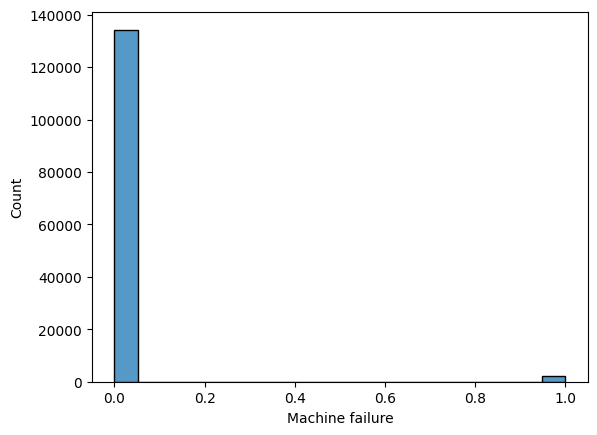

In [ ]:
sns.histplot(df,x='Machine failure')

In [ ]:
c_true=0
c_false=0
for i in df['Machine failure']:
  if i == 1:
    c_true += 1
  if i == 0:
    c_false += 1
print('No. of Machine Failed: - ',c_true)
print('No. of Machine working well: - ',c_false)

No. of Machine Failed: -  2148
No. of Machine working well: -  134281


[]

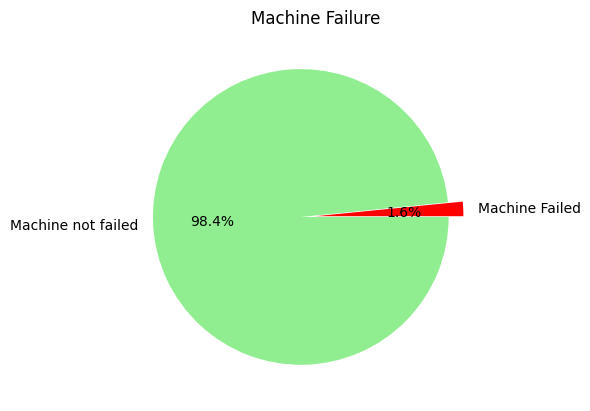

In [ ]:
pie_x = [c_true,c_false]
pie_label = ['Machine Failed','Machine not failed']

plt.pie(pie_x,labels=pie_label,autopct='%1.1f%%',explode=(0,0.1),colors=['red','lightgreen'])
plt.title("Machine Failure")
plt.plot()

Referred from https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

In [ ]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
# case 1:
new_order = ['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']

# Case 2:
# df = df.drop(columns=['TWF', 'HDF', 'PWF', 'OSF','RNF'])
# new_order = ['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
#        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']

df = df[new_order]


In [ ]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,2752,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,8620,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2344,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,4704,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,9727,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
df.corr()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
Product ID,1.000000,0.816019,0.033714,0.156339,-0.002115,0.001920,0.001171,0.003908,-0.007819,-0.002164,-0.012263,0.000912,-0.012742
Type,0.816019,1.000000,0.013330,0.003752,-0.002327,0.002160,0.004057,0.000322,0.004929,0.003541,-0.014087,0.002238,-0.005049
Air temperature [K],0.033714,0.013330,1.000000,0.856080,0.016545,-0.006773,0.016994,0.003826,0.100454,0.007967,0.007842,0.004815,0.067744
Process temperature [K],0.156339,0.003752,0.856080,1.000000,0.011263,-0.006298,0.012777,0.004459,0.041454,0.003871,0.005337,0.004399,0.030966
Rotational speed [rpm],-0.002115,-0.002327,0.016545,0.011263,1.000000,-0.779394,0.003983,-0.005765,-0.081996,0.053948,-0.061376,-0.003410,-0.060868
Torque [Nm],0.001920,0.002160,-0.006773,-0.006298,-0.779394,1.000000,-0.003148,0.012983,0.100773,0.050289,0.108765,0.007986,0.145793
Tool wear [min],0.001171,0.004057,0.016994,0.012777,0.003983,-0.003148,1.000000,0.046470,0.011709,0.007624,0.063604,-0.002071,0.056448
TWF,0.003908,0.000322,0.003826,0.004459,-0.005765,0.012983,0.046470,1.000000,0.010145,0.039927,0.036041,0.002044,0.311919
HDF,-0.007819,0.004929,0.100454,0.041454,-0.081996,0.100773,0.011709,0.010145,1.000000,0.046680,0.067149,0.000885,0.564507
PWF,-0.002164,0.003541,0.007967,0.003871,0.053948,0.050289,0.007624,0.039927,0.046680,1.000000,0.090016,0.000827,0.383941


We can see that HDF, RNF, OSF, TWF is highly correlated to the target value called Machine failure.

<Axes: >

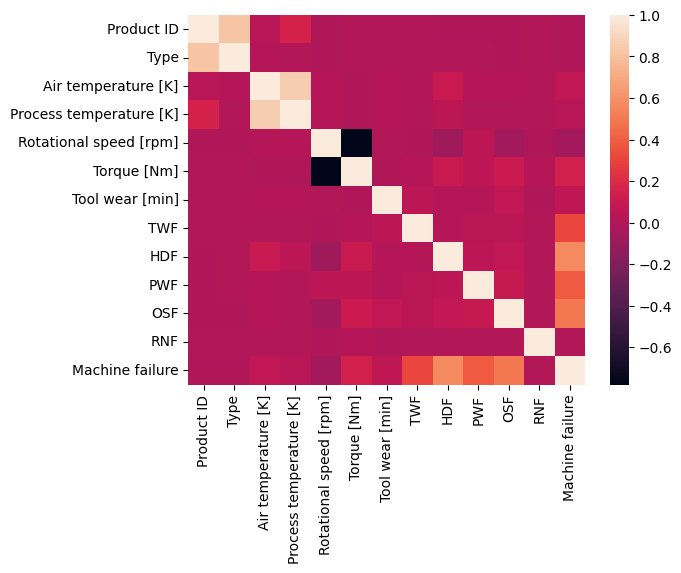

In [ ]:
sns.heatmap(df.corr())

**Spliting the dataset into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure'],
      dtype='object')

In [ ]:
# x = df.iloc[:,df.columns != 'Machine failure']
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
print(x) # Independent variables

        Product ID  Type  Air temperature [K]  Process temperature [K]  \
0             2752     1                300.6                    309.6   
1             8620     2                302.6                    312.1   
2             2344     1                299.3                    308.5   
3             4704     1                301.0                    310.9   
4             9727     2                298.0                    309.0   
...            ...   ...                  ...                      ...   
136424        9220     2                300.1                    311.4   
136425         838     0                297.5                    308.5   
136426        5502     1                300.5                    311.8   
136427        5024     1                301.7                    310.9   
136428        1453     1                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
0                         1596  

In [ ]:
print(y) # Dependend variable or Targeted Variable.

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64


For Splitting, I have considered 70% of the entire train.csv data as a training dataset and 30% of dataset as a testing dataset.

In [ ]:
 X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
print(X_train)

        Product ID  Type  Air temperature [K]  Process temperature [K]  \
58494         3673     1                302.6                    310.4   
75360         9451     2                298.9                    310.6   
131485        7633     2                299.6                    308.8   
45948         5392     1                300.0                    310.5   
105004         641     0                300.2                    309.8   
...            ...   ...                  ...                      ...   
110268         424     0                302.4                    310.9   
119879        1923     1                298.0                    309.2   
103694        9016     2                301.1                    310.7   
131932         692     0                300.8                    311.4   
121958         623     0                300.2                    309.8   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
58494                     1417  

In [ ]:
print(Y_train)

58494     0
75360     0
131485    0
45948     0
105004    0
         ..
110268    0
119879    0
103694    0
131932    0
121958    0
Name: Machine failure, Length: 95500, dtype: int64


In [ ]:
print(X_test)

        Product ID  Type  Air temperature [K]  Process temperature [K]  \
123128        4655     1                300.9                    310.7   
54705         5562     1                300.5                    311.3   
40016         5222     1                300.6                    310.4   
75025         6159     1                297.6                    308.4   
120421        4645     1                300.8                    310.7   
...            ...   ...                  ...                      ...   
108954        6372     1                297.4                    308.4   
32572         1472     1                296.8                    308.0   
131996        6461     1                297.2                    308.0   
63757         6470     1                297.2                    308.1   
58934         2999     1                301.3                    310.8   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
123128                    1368  

In [ ]:
print(Y_test)

123128    1
54705     0
40016     0
75025     0
120421    0
         ..
108954    0
32572     0
131996    0
63757     0
58934     0
Name: Machine failure, Length: 40929, dtype: int64


# Model Selection

In [ ]:
df['Machine failure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 136429 entries, 0 to 136428
Series name: Machine failure
Non-Null Count   Dtype
--------------   -----
136429 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


In [ ]:
print("Number of Unique values in the Machine failure variable is ",df['Machine failure'].nunique())

Number of Unique values in the Machine failure variable is  2


In [ ]:
print("Unique Values in Machine failure:", df['Machine failure'].unique())

Unique Values in Machine failure: [0 1]


Based on the above analysis, The target column 'Machine failure' has two unique value that is '0' zero and '1' one. In addition to that all the other independent columns values also converted into the numberic values.

According to me, Logistic Regression model will perfectly fit for this dataset, as the targeted column has only two unique values that is 0 and 1. where 0 is for Machine not failed and 1 for Machine failed.

Referred from https://h2o.ai/wiki/logistic-regression/

Where is logistic regression used?
Logistic regression is used to predict the categorical dependent variable. It's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1.

https://h2o.ai/wiki/logistic-regression/#:~:text=Logistic%20regression%20is%20used%20to%20predict%20the%20categorical%20dependent%20variable,history%20and%20other%20such%20factors.


Before selecting the model, I have also gone through various other classification algorithms on youtube.

https://www.youtube.com/watch?v=e-lHu0U9UY4

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

Training the selected classifier named Logistic regression using the training set.

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Referred tutotial from https://www.youtube.com/watch?v=zM4VZR0px8E

Evaluate the performance of the model on the training set using appropriate
metrics

In [ ]:
print('Train Score: ', model.score(X_train, Y_train))

Train Score:  0.9894973821989529


In [ ]:
Y_train_pred = model.predict(X_train)
print(Y_train_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_train,Y_train_pred)

array([[93844,   141],
       [  862,   653]])

Displaying a confusion matrix of training set to aid in visualizing the results

Confusion matrix of training set


<Axes: >

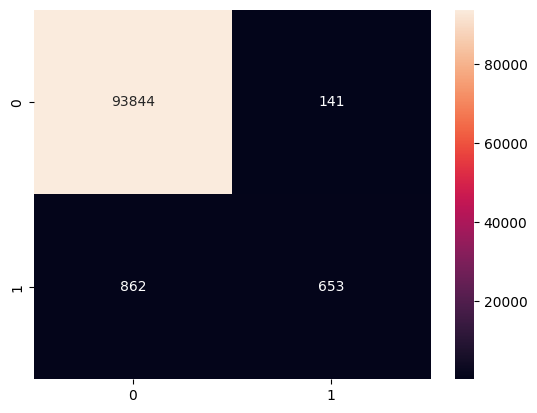

In [ ]:
print("Confusion matrix of training set")
sns.heatmap(confusion_matrix(Y_train,Y_train_pred),annot=True, fmt=".0f")

Evaluting the performance of the model using training set data.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(Y_train, Y_train_pred)
print("Accuracy score is ",accuracy)

Accuracy score is  0.9894973821989529


In [ ]:
class_report = classification_report(Y_train, Y_train_pred)
print("\nClassification Report of model evalution of training set data: ")
print(class_report)


Classification Report of model evalution of training set data: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     93985
           1       0.82      0.43      0.57      1515

    accuracy                           0.99     95500
   macro avg       0.91      0.71      0.78     95500
weighted avg       0.99      0.99      0.99     95500



In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('Mean squared error of training set is ', mean_squared_error(Y_train, Y_train_pred))

Mean squared error of training set is  0.01050261780104712


# Model Testing

 Test the trained model on the testing set.

In [ ]:
model.fit(X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print('Test Score: ', model.score(X_test, Y_test))

Test Score:  0.9859757140413887


In [ ]:
Y_test_pred = model.predict(X_test)
print(Y_test_pred)

[0 0 0 ... 0 0 0]


In [ ]:
confusion_matrix(Y_test,Y_test_pred)

array([[40277,    19],
       [  555,    78]])

Displaying a confusion matrix of testing set to aid in visualizing the results

Confusion matrix of testing set


<Axes: >

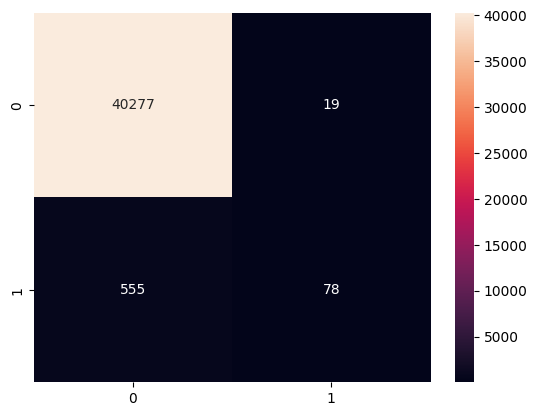

In [ ]:
print("Confusion matrix of testing set")
sns.heatmap(confusion_matrix(Y_test,Y_test_pred),annot=True, fmt=".0f")

Evaluate the performance of the model on the testing set using appropriate
metrics.

In [ ]:
accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy score is ",accuracy)

Accuracy score is  0.9859757140413887


In [ ]:
class_report = classification_report(Y_test, Y_test_pred)
print("\nClassification Report of model evalution of testing set data:")
print(class_report)


Classification Report of model evalution of testing set data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     40296
           1       0.80      0.12      0.21       633

    accuracy                           0.99     40929
   macro avg       0.90      0.56      0.60     40929
weighted avg       0.98      0.99      0.98     40929



In [ ]:
print('Mean squared error of testing set is ', mean_squared_error(Y_test, Y_test_pred))

Mean squared error of testing set is  0.014024285958611254


# Predicting the values using test.csv file.

In [ ]:
t_df = pd.read_csv('./test.csv')

In [ ]:
t_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [ ]:
t_df.shape

(90954, 13)

In [ ]:
t_df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Here, the targeted column 'Machine Failure' is not given.

In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [ ]:
t_df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Deleting Unnecessary column.

In [ ]:
t_df = t_df.drop(columns=['id'])

converting the non-numeric values into numeric values using label encoding.

In [ ]:
t_df['Product ID'] = label_encoder.fit_transform(t_df['Product ID'])
print(df['Product ID'].head())

0    2752
1    8620
2    2344
3    4704
4    9727
Name: Product ID, dtype: int64


In [ ]:
t_df['Type'] = label_encoder.fit_transform(t_df['Type'])
print(df['Type'].head())

0    1
1    2
2    1
3    1
4    2
Name: Type, dtype: int64


In [ ]:
t_df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,3203,1,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,4986,1,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,2958,1,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,8828,2,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,8368,2,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [ ]:
t_df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Accumulating all the column into one variable.

In [ ]:
independent = t_df.iloc[:]
print(independent)

       Product ID  Type  Air temperature [K]  Process temperature [K]  \
0            3203     1                302.3                    311.5   
1            4986     1                301.7                    311.0   
2            2958     1                301.3                    310.4   
3            8828     2                300.1                    309.6   
4            8368     2                303.4                    312.3   
...           ...   ...                  ...                      ...   
90949        3332     1                302.3                    311.4   
90950        1347     1                297.9                    309.8   
90951        1533     1                295.6                    306.2   
90952        2040     1                298.1                    307.8   
90953        4169     1                303.5                    312.8   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
0                        1499         38.0   

In [ ]:
print(type(independent))

<class 'pandas.core.frame.DataFrame'>


**Predicting the target value called machine failure using our trained model named 'model' using Logistic regression.**

In [ ]:
target = model.predict(independent)
print(target)

[0 0 0 ... 0 0 0]


In [ ]:
resultant_df = t_df

In [ ]:
resultant_df.shape

(90954, 12)

In [ ]:
resultant_df['Machine_Failure (Target)'] = target

In [ ]:
resultant_df.shape

(90954, 13)

In [ ]:
resultant_df['Machine_Failure (Target)'] = resultant_df['Machine_Failure (Target)'].replace({0: 'No', 1: 'Yes'})

In [ ]:
print(resultant_df)

       Product ID  Type  Air temperature [K]  Process temperature [K]  \
0            3203     1                302.3                    311.5   
1            4986     1                301.7                    311.0   
2            2958     1                301.3                    310.4   
3            8828     2                300.1                    309.6   
4            8368     2                303.4                    312.3   
...           ...   ...                  ...                      ...   
90949        3332     1                302.3                    311.4   
90950        1347     1                297.9                    309.8   
90951        1533     1                295.6                    306.2   
90952        2040     1                298.1                    307.8   
90953        4169     1                303.5                    312.8   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
0                        1499         38.0   

In [ ]:
resultant_df['Machine_Failure (Target)'].unique()

array(['No', 'Yes'], dtype=object)

No. of Machines Failed: -  238
No. of Machines working well: -  90716


[]

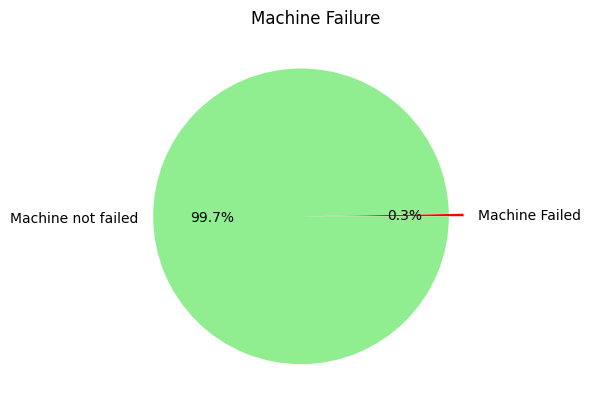

In [ ]:
c_true=0
c_false=0
for i in resultant_df['Machine_Failure (Target)']:
  if i == 'Yes':
    c_true += 1
  if i == 'No':
    c_false += 1
print('No. of Machines Failed: - ',c_true)
print('No. of Machines working well: - ',c_false)

pie_x = [c_true,c_false]
pie_label = ['Machine Failed','Machine not failed']

plt.pie(pie_x,labels=pie_label,autopct='%1.1f%%',explode=(0,0.1),colors=['red','lightgreen'])
plt.title("Machine Failure")
plt.plot()

<Axes: xlabel='Machine_Failure (Target)', ylabel='Count'>

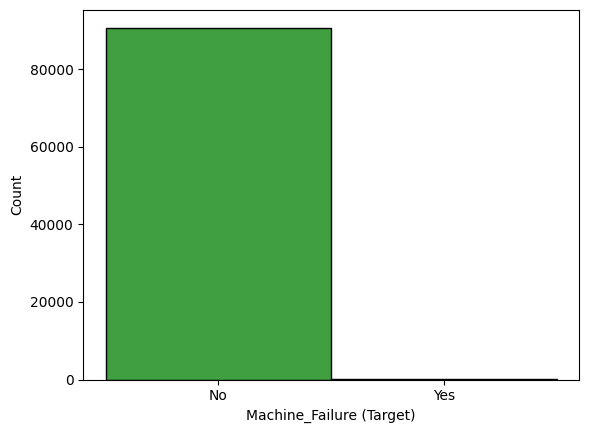

In [ ]:
sns.histplot(resultant_df,x='Machine_Failure (Target)',color='green',bins='auto')

# Conclusion:

In this analytical experiment, I can observed that logistic regression model perfectly fit for this dataset, as we can see that it has achieved high accuracy score of 98.69% for training set and 98.58% for testing set and high model score of 98.59 for training set and high model score of 99.15 for testing set on considering the data splitting ratio of 70% for training and 30% for testing dataset. In addition to that, for both training set and testing set data Mean Squared Error value is 0.0140 and 0.0084 respectively, which interprets as  model's predictions are closer to the actual values.

There are certain categorical variable like TWF, HDF, PWF, OSF, RNF in the dataset, according to me, It does not have any association with the targeted variable also any one of it could be considered as targeted variable.
but, resulted accuracy score without considering the list of columns TWF, HDF, PWF, OSF, RNF is 98.47% with the training set and 98.44% with the testing set are almost same on comparing it, with considering that variable.
but, we have to consider this variable as it has high correlation value with the targeted column called machine failure.

while splitting the data

1.   if Random state value is	default then accuracy score is 98.69
2.   if Random state value is	42 then accuracy score is 98.94
3.   if Random state value is	10 then accuracy score is 98.57
4.   if Random state value is	75 then accuracy score is 98.54


it lies in the same range values.

I have also Implement this model with the test.csv data, it works well and able the to classify the targeted value, as it help to predict that this machine will fail or will not fail with this feature (data).

